## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os

# visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetch the path for the data
processed_path = os.path.join("..", "data", "interim")

# load the processed data
test_processed_data = pd.read_csv(os.path.join(processed_path, 'test_processed.csv'))
train_processed_data = pd.read_csv(os.path.join(processed_path, 'train_processed.csv'))

In [3]:
# Concatenate the train and test data
df1 = pd.concat([train_processed_data, test_processed_data], axis=0, ignore_index=True)

In [4]:
df1.isna().sum()

content    233
label        0
dtype: int64

In [5]:
df1 = df1.dropna()

In [6]:
df = df1.copy()

In [7]:
df.shape

(199468, 2)

In [8]:
# Check the columns
df.columns

Index(['content', 'label'], dtype='object')

C:\Users\praye\AppData\Local\Temp\ipykernel_23620\3371327842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


<Axes: xlabel='label', ylabel='count'>

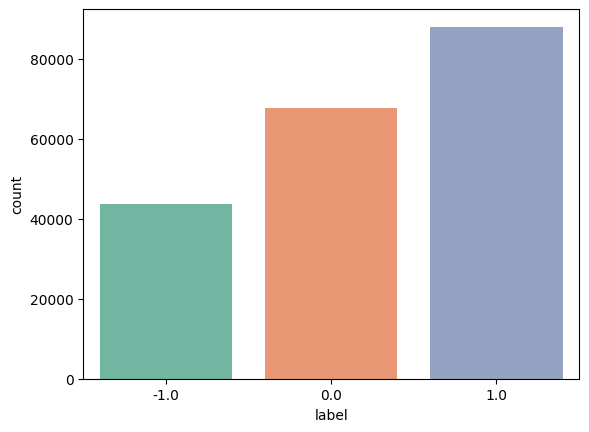

In [9]:
# Perform the Count plot on the target variable
sns.countplot(data=df, x='label', palette='Set2')

In [10]:
df['label'].value_counts(normalize=True).mul(100).round(2)

label
 1.0    44.11
 0.0    33.96
-1.0    21.93
Name: proportion, dtype: float64

In [11]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

In [12]:
df.sample(5)

,content,label,word_count
163568,modi name possibility modi name perfection mod...,0.0,11
168648,not get money time show going flop tried farme...,-1.0,18
54307,big menace country jagan naidu,0.0,5
164106,movie planned release election time cash vote ...,0.0,25
158283,ipl one best must say rabada one rarest bowler...,1.0,15


In [13]:
df['word_count'].describe()

count    199468.000000
mean         15.734719
std          18.517365
min           1.000000
25%           7.000000
50%          13.000000
75%          21.000000
max         897.000000
Name: word_count, dtype: float64

Text(0.5, 1.0, 'Word Count Distribution')

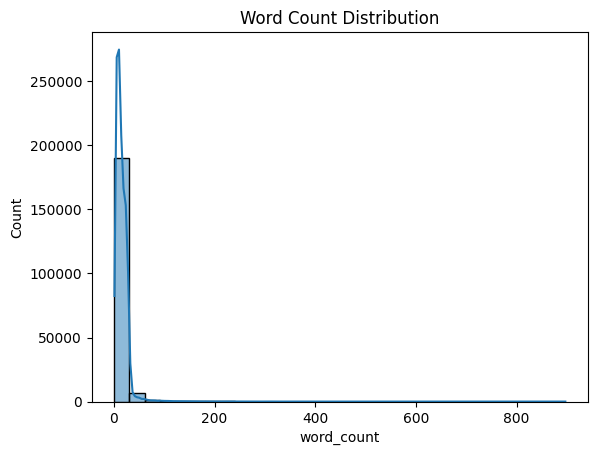

In [14]:
sns.histplot(df['word_count'], bins=30, kde=True, alpha=0.5)
plt.title('Word Count Distribution')

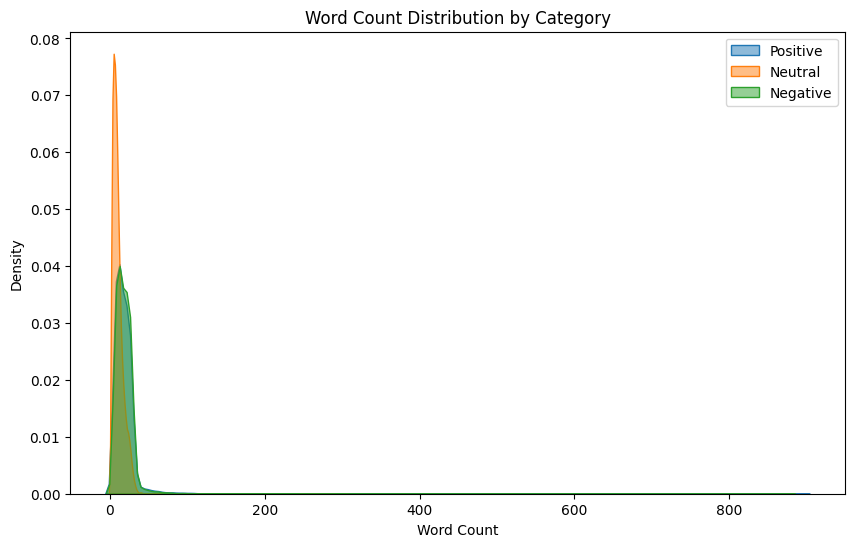

In [15]:
plt.figure(figsize=(10, 6))

# Plot kde plot for label 1
sns.kdeplot(data=df[df['label'] == 1], x='word_count', fill=True, alpha=0.5, label='Positive')

# Plot kde plot for label 0
sns.kdeplot(data=df[df['label'] == 0], x='word_count', fill=True, alpha=0.5, label='Neutral')

# Plot kde plot for label -1
sns.kdeplot(data=df[df['label'] == -1], x='word_count', fill=True, alpha=0.5, label='Negative')

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

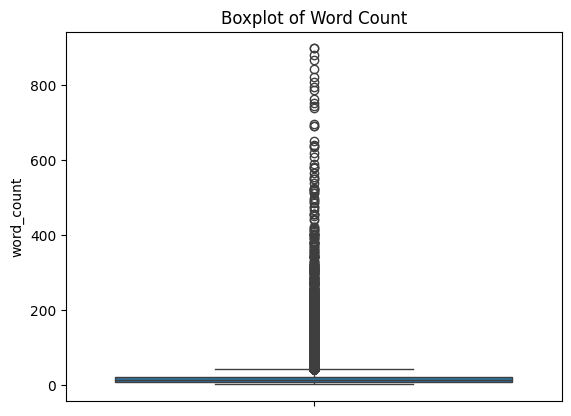

In [16]:
sns.boxplot(data=df, y='word_count')
plt.title('Boxplot of Word Count')
plt.show()

C:\Users\praye\AppData\Local\Temp\ipykernel_23620\127621908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='word_count', palette='Set2')


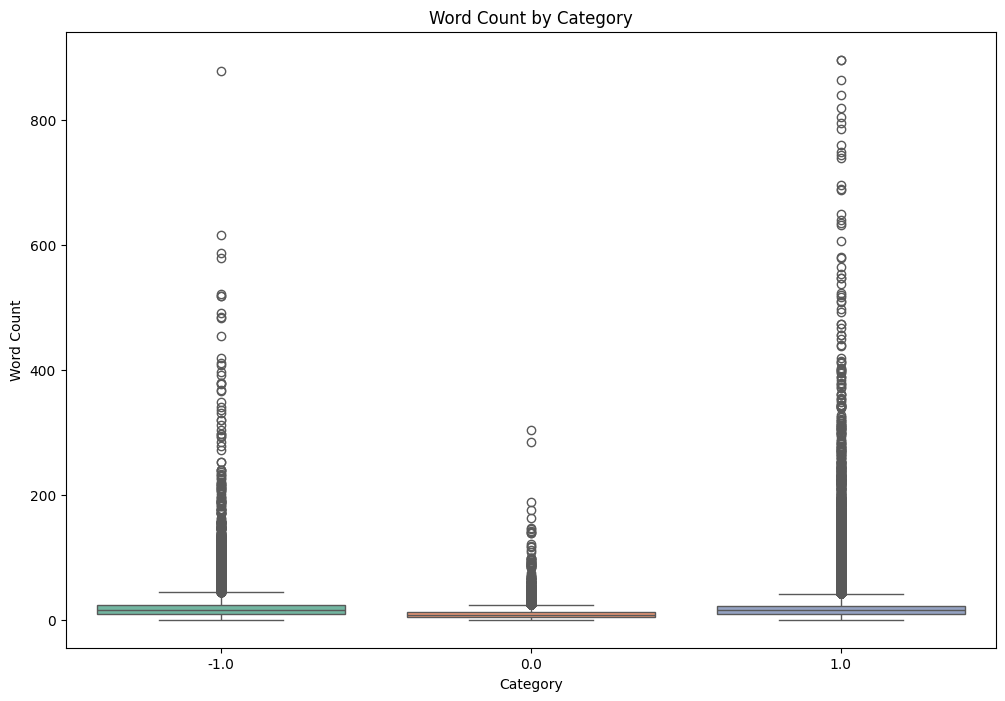

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='label', y='word_count', palette='Set2')
plt.title('Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

C:\Users\praye\AppData\Local\Temp\ipykernel_23620\3006860989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='label', y='word_count', palette='Set2', estimator='median')


<Axes: xlabel='label', ylabel='word_count'>

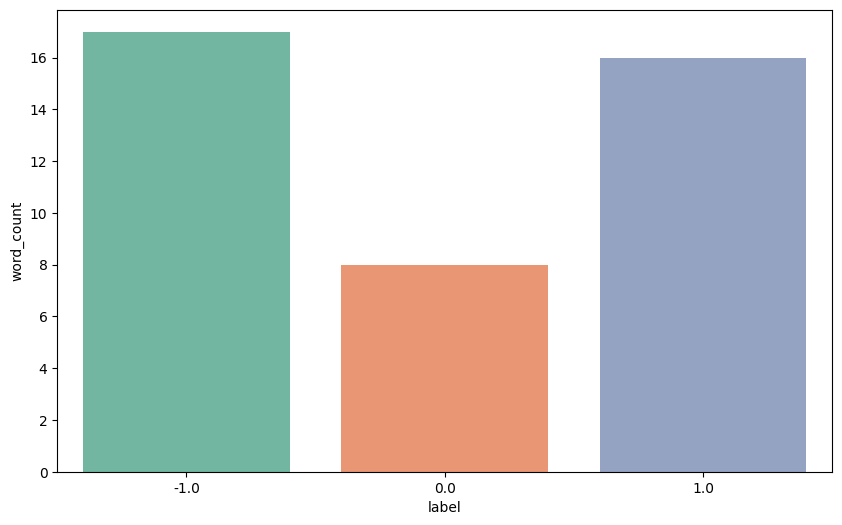

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='label', y='word_count', palette='Set2', estimator='median')

In [19]:
df['num_chars'] = df['content'].apply(len)

df.head()

,content,label,word_count,num_chars
0,welp youtube gonna let soulless corporation do...,0.0,19,126
1,said deep propaganda modi wrote personal lette...,1.0,25,159
2,subscribed fun series world thanks please vote...,1.0,8,51
3,egoistic priyankavadramayawati mamtanaidu pull...,-1.0,29,185
4,innocent janata chatur modi,1.0,4,27


In [20]:
df['num_chars'].describe()

count    199468.000000
mean        103.978528
std         128.218098
min           1.000000
25%          47.000000
50%          84.000000
75%         140.000000
max        6596.000000
Name: num_chars, dtype: float64

In [21]:
from collections import Counter

# Count the number of characters in each label
all_text = ' '.join(df['content'])

char_count = Counter(all_text)

# Get the most common characters
char_freq_df = pd.DataFrame(char_count.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [22]:
char_freq_df['character'].values

array([' ', 'e', 'a', 'i', 'n', 'o', 't', 'r', 's', 'd', 'l', 'm', 'c',
       'p', 'h', 'u', 'g', 'y', 'b', 'k', 'w', 'v', 'f', 'j', 'x', 'z',
       'q'], dtype=object)

In [23]:
char_freq_df.tail(10)

,character,frequency
5,y,335292
9,b,288305
21,k,255677
0,w,251441
20,v,233780
19,f,202714
23,j,86372
25,x,29936
24,z,18580
26,q,15736


C:\Users\praye\AppData\Local\Temp\ipykernel_23620\70537783.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams_df, x='count', y='bigram', palette='magma')


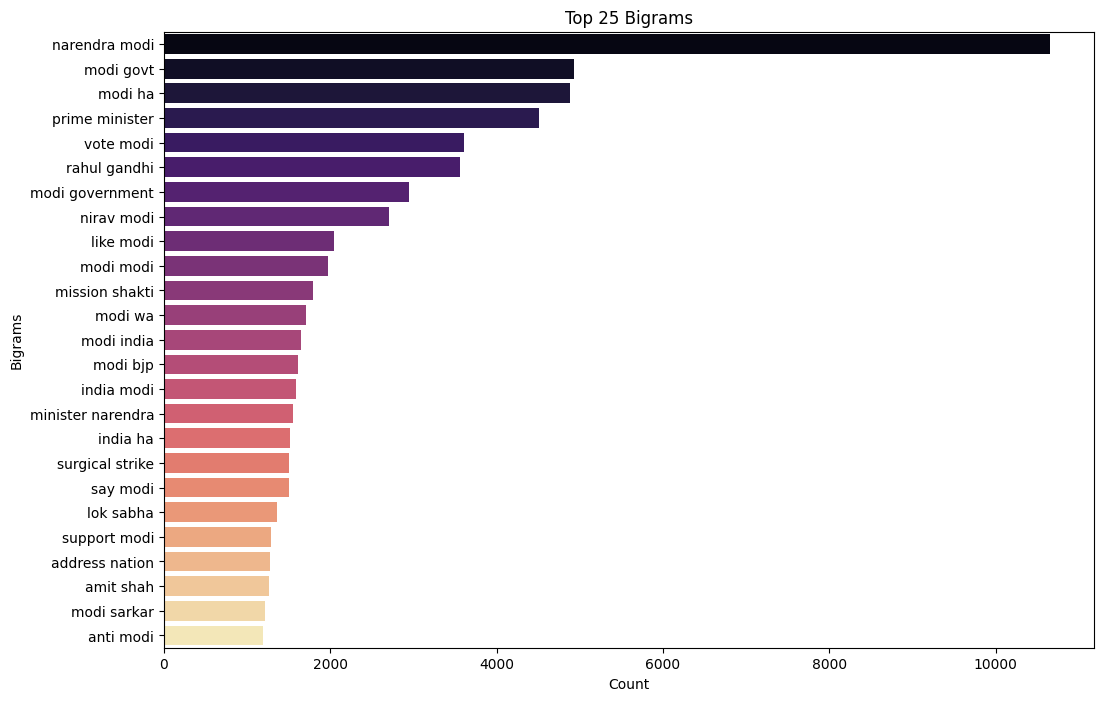

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top n bigrams
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_bigrams = get_top_n_bigrams(df['content'], 25)

# Create a DataFrame for better visualization
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Plot the Count plot for the top bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show()

C:\Users\praye\AppData\Local\Temp\ipykernel_23620\1902720988.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams_df, x='count', y='bigram', palette='magma')


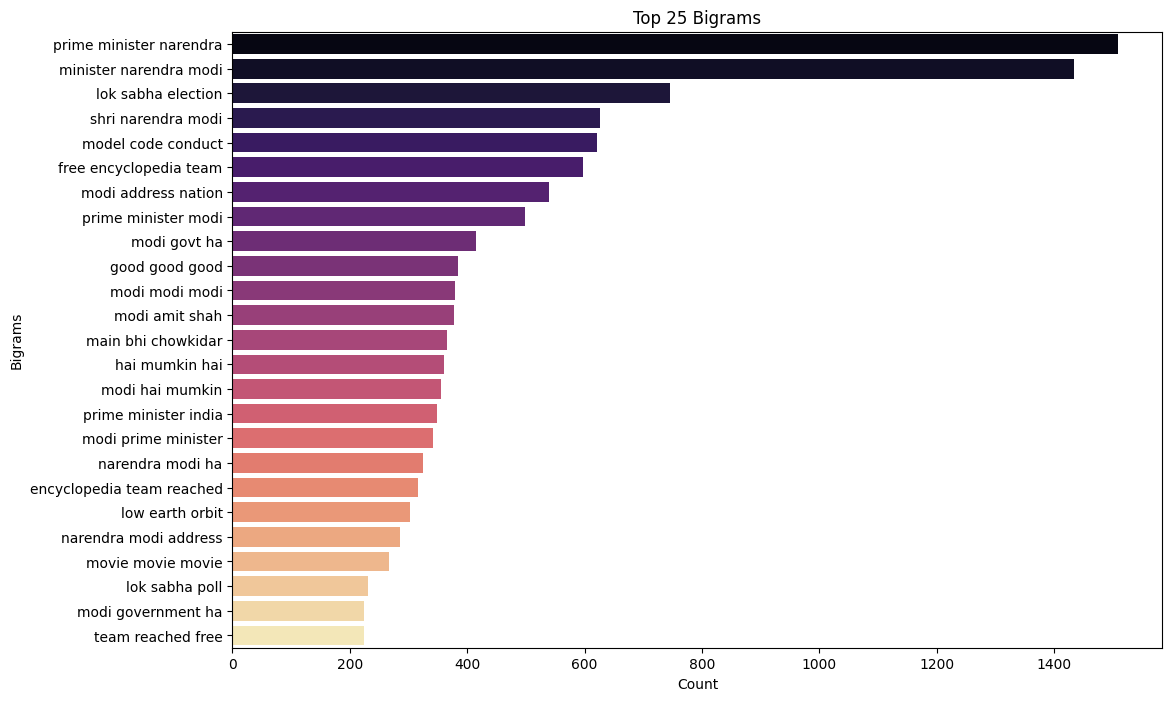

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top n trigrams
def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_trigrams = get_top_n_trigrams(df['content'], 25)

# Create a DataFrame for better visualization
top_bigrams_df = pd.DataFrame(top_trigrams, columns=['bigram', 'count'])

# Plot the Count plot for the top bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show()

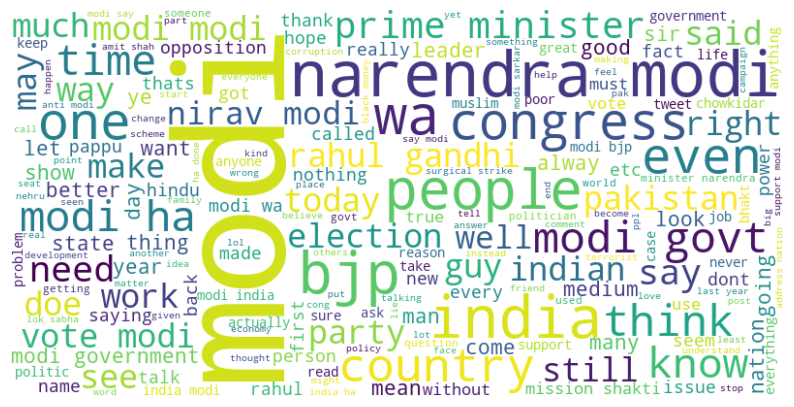

In [26]:
# Plot the Word Cloud for the content
from wordcloud import WordCloud

def plot_world_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_world_cloud(df['content'])

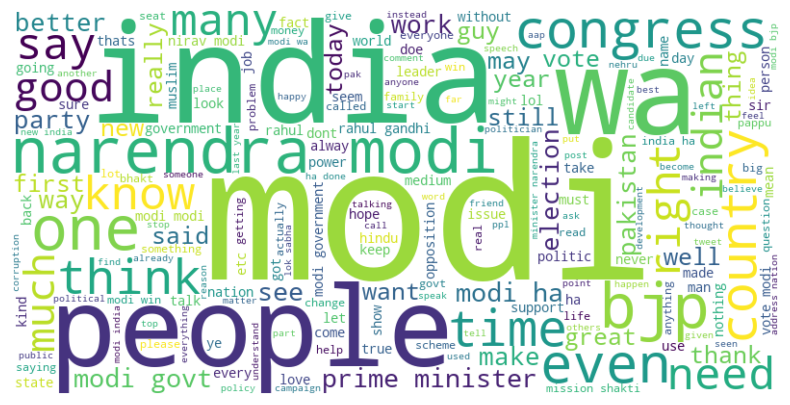

In [27]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['label'] == 1]['content'])

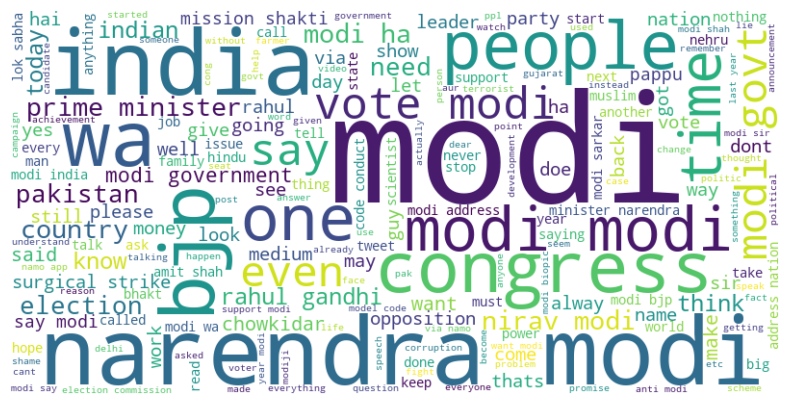

In [28]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['label'] == 0]['content'])

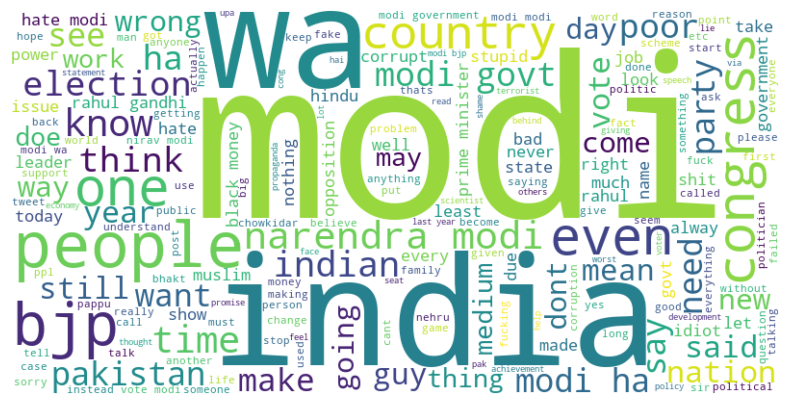

In [29]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
plot_word_cloud(df[df['label'] == -1]['content'])

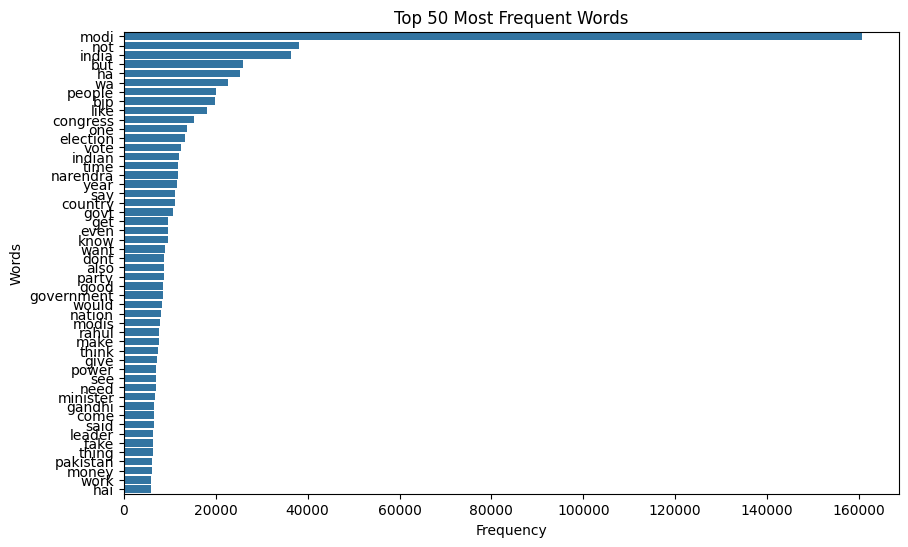

In [30]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['content']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


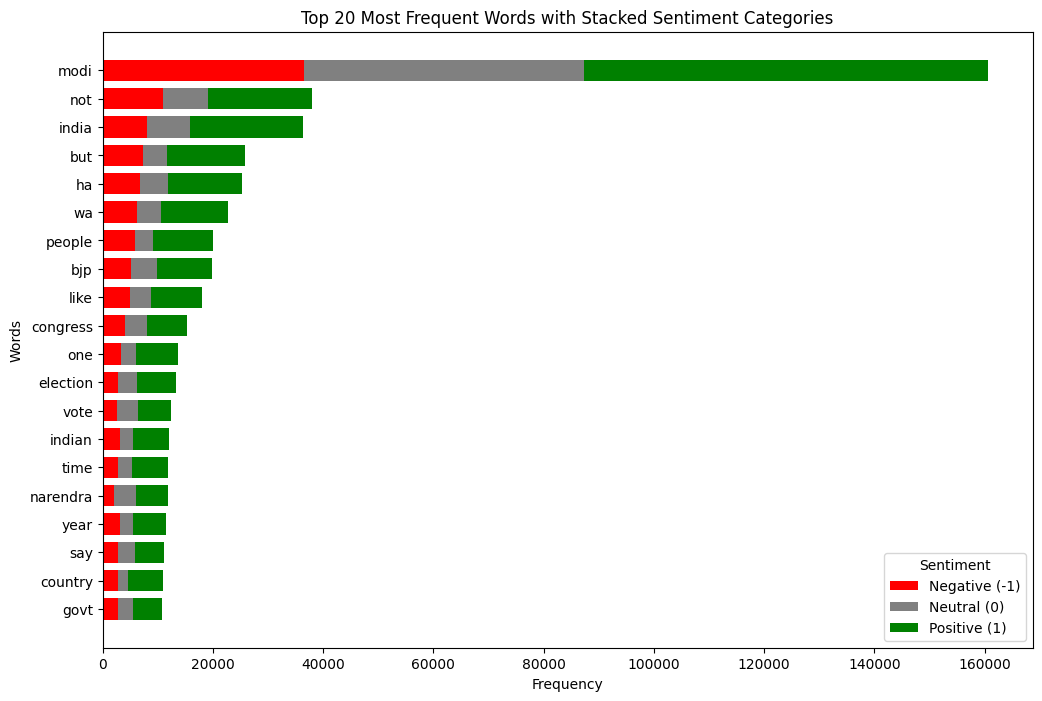

In [31]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['content'].split()
        category = row['label']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)


In [32]:
import spacy
from collections import Counter

# Load small English model
nlp = spacy.load("en_core_web_sm")

In [33]:
def extract_entities(texts):
    entity_counter = Counter()
    entity_labels = []

    for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
        for ent in doc.ents:
            entity_counter[ent.text.strip()] += 1
            entity_labels.append((ent.text.strip(), ent.label_))

    return entity_counter, entity_labels

# Limit to 1000 rows for speed (optional)
texts = df['content'].head(1000).tolist()

entity_freqs, entity_details = extract_entities(texts)

# Top 10 entities
print(entity_freqs.most_common(10))


d:\youtube-comments-analysis\myenv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


[('india', 134), ('congress', 63), ('indian', 57), ('one', 37), ('narendra', 25), ('today', 23), ('muslim', 23), ('pakistan', 21), ('hai', 19), ('narendra modi', 14)]


C:\Users\praye\AppData\Local\Temp\ipykernel_23620\4275040861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entity_df, y='Entity', x='Frequency', palette='magma', legend=False)


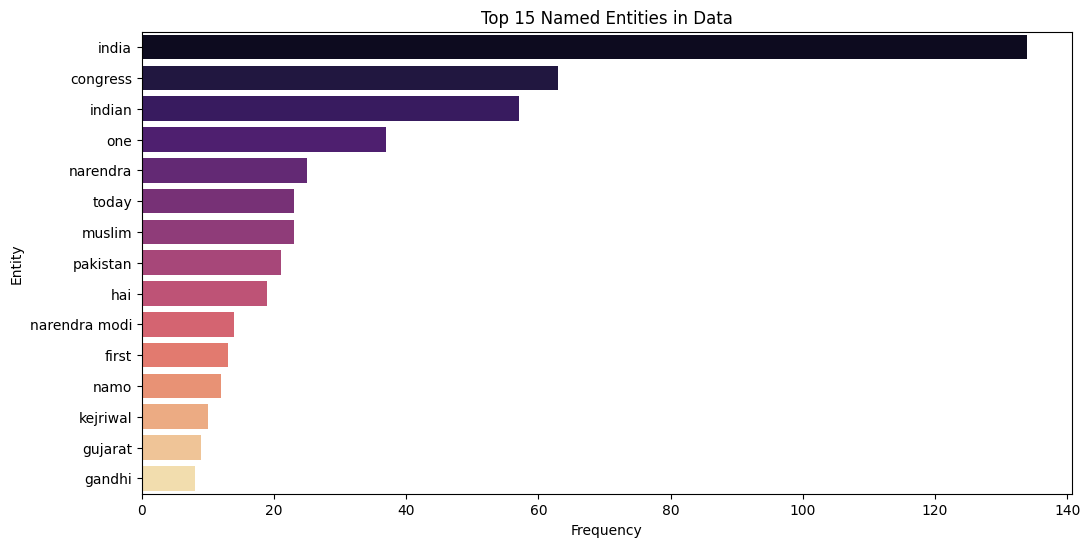

In [34]:
import matplotlib.pyplot as plt

# Convert to DataFrame
entity_df = pd.DataFrame(entity_freqs.most_common(15), columns=['Entity', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=entity_df, y='Entity', x='Frequency', palette='magma', legend=False)
# plt.barh(entity_df['Entity'], entity_df['Frequency'], pa='magma',)
plt.xlabel('Frequency')
plt.title('Top 15 Named Entities in Data')
plt.gca()
plt.show()


In [38]:
train_processed_data.isna().sum(), test_processed_data.isna().sum()

(content    0
 label      0
 dtype: int64,
 content    0
 label      0
 dtype: int64)

In [37]:
train_processed_data = train_processed_data.dropna().copy()
test_processed_data = test_processed_data.dropna().copy()

In [39]:
# Export the processed data to CSV files

## Train data
train_processed_path = os.path.join("..", "data", "interim", "train_processed.csv")
train_processed_data.to_csv(train_processed_path, index=False)

## Test data
test_processed_path = os.path.join("..", "data", "interim", "test_processed.csv")
test_processed_data.to_csv(test_processed_path, index=False)